# Stock Market Analysis
## Exploratory Data Analysis and Visualization Project

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas_datareader as pdr
import warnings
warnings.filterwarnings(action = 'ignore')
sns.set_style('darkgrid')

### We get the stock market data for the following Banks.

* Bank of America - 'BAC'
* CitiGroup - 'C'
* Goldman Sachs - 'GS'
* JPMorgan Chase - 'JPM'
* Morgan Stanley - 'MS'
* Wells Fargo - 'WFC'

In [3]:
# Bank Ticks used as acronym for the banks
ticks = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [4]:
# Method to import data from pandas_datareader
import pandas_datareader.data as web
df = web.DataReader('GE', 'yahoo', start='2005-01-01', end='2022-01-01')

In [5]:
# Loading stock data for all the banks
BAC = web.DataReader('BAC', 'yahoo', start='2005-01-01', end='2022-01-01')
C = web.DataReader('C', 'yahoo', start='2005-01-01', end='2022-01-01')
GS = web.DataReader('GS', 'yahoo', start='2005-01-01', end='2022-01-01')
JPM = web.DataReader('JPM', 'yahoo', start='2005-01-01', end='2022-01-01')
MS = web.DataReader('MS', 'yahoo', start='2005-01-01', end='2022-01-01')
WFC = web.DataReader('WFC', 'yahoo', start='2005-01-01', end='2022-01-01')

In [6]:
# Concatinating all the dataframes
df = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys=ticks)

In [7]:
df.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2004-12-31  47.220001  46.770000  46.810001  46.990002   5348800.0  31.937805   
2005-01-03  46.950001  46.180000  46.660000  46.459999  10238100.0  31.577564   
2005-01-04  46.730000  45.740002  46.410000  45.820000  10264100.0  31.142586   
2005-01-05  45.939999  45.250000  45.639999  45.290001  14796100.0  30.782352   
2005-01-06  45.630001  44.990002  45.419998  45.220001  14602200.0  30.734764   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2004-12-31  483.299988  480.000000  481.299988  481.799988  ...  55.259998   
2005-01-03  490.000000  482.000000  490.000000  482.700012  ...  55.970001   
2005-01-04  487.700012  477.000000  482.799988  478.600006  ...  56.000000   
2005-01-05  487.799988  480.200012  480.500000  484.600006  ...  55.049999   
2005-01-06  492.399994  487.399994  488.000000  489.299988  ...  55.950001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2004-12-31  55.520000  2449700.0  32.560066  31.235001  31.075001  31.129999   
2005-01-03  55.900002  5105800.0  32.782925  31.165001  30.875000  31.115000   
2005-01-04  55.299999  6100300.0  32.431049  31.250000  30.885000  30.975000   
2005-01-05  54.980000  5072100.0  32.243401  31.375000  30.975000  31.040001   
2005-01-06  56.279999  5991400.0  33.005802  31.150000  30.900000  31.049999   

                                             
                Close     Volume  Adj Close  
Date                                         
2004-12-31  31.075001  2721400.0  18.828047  
2005-01-03  30.955000  8168200.0  18.755335  
2005-01-04  30.980000  9241400.0  18.770483  
2005-01-05  31.014999  7694600.0  18.791689  
2005-01-06  31.125000  8887600.0  18.858334  

[5 rows x 36 columns]

In [8]:
# Setting Column Names
df.columns.names = ['Ticks', 'Info']

In [9]:
df.head()

Ticks             BAC                                                          \
Info             High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2004-12-31  47.220001  46.770000  46.810001  46.990002   5348800.0  31.937805   
2005-01-03  46.950001  46.180000  46.660000  46.459999  10238100.0  31.577564   
2005-01-04  46.730000  45.740002  46.410000  45.820000  10264100.0  31.142586   
2005-01-05  45.939999  45.250000  45.639999  45.290001  14796100.0  30.782352   
2005-01-06  45.630001  44.990002  45.419998  45.220001  14602200.0  30.734764   

Ticks                C                                      ...         MS  \
Info              High         Low        Open       Close  ...       Open   
Date                                                        ...              
2004-12-31  483.299988  480.000000  481.299988  481.799988  ...  55.259998   
2005-01-03  490.000000  482.000000  490.000000  482.700012  ...  55.970001   
2005-01-04  487.700012  477.000000  482.799988  478.600006  ...  56.000000   
2005-01-05  487.799988  480.200012  480.500000  484.600006  ...  55.049999   
2005-01-06  492.399994  487.399994  488.000000  489.299988  ...  55.950001   

Ticks                                              WFC                        \
Info            Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2004-12-31  55.520000  2449700.0  32.560066  31.235001  31.075001  31.129999   
2005-01-03  55.900002  5105800.0  32.782925  31.165001  30.875000  31.115000   
2005-01-04  55.299999  6100300.0  32.431049  31.250000  30.885000  30.975000   
2005-01-05  54.980000  5072100.0  32.243401  31.375000  30.975000  31.040001   
2005-01-06  56.279999  5991400.0  33.005802  31.150000  30.900000  31.049999   

Ticks                                        
Info            Close     Volume  Adj Close  
Date                                         
2004-12-31  31.075001  2721400.0  18.828047  
2005-01-03  30.955000  8168200.0  18.755335  
2005-01-04  30.980000  9241400.0  18.770483  
2005-01-05  31.014999  7694600.0  18.791689  
2005-01-06  31.125000  8887600.0  18.858334  

[5 rows x 36 columns]

# Exploratory Data Analysis

In [10]:
# Maximum Open Price
df.xs(key = 'Open', axis = 1, level = 'Info').max()

Ticks
BAC     55.040001
C      566.000000
GS     423.119995
JPM    172.710007
MS     105.629997
WFC     65.889999
dtype: float64

In [11]:
# Checking the maximum Close Price for all the Stocks in the DataFrame
df['BAC']['Close'].max()

for i in ticks:
    print('%s Maximum Close Price: '%i, df[i]['Close'].max())

BAC Maximum Close Price:  54.900001525878906
C Maximum Close Price:  564.0999755859375
GS Maximum Close Price:  423.8500061035156
JPM Maximum Close Price:  171.77999877929688
MS Maximum Close Price:  105.44999694824219
WFC Maximum Close Price:  65.93000030517578


#### Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [12]:
returns = pd.DataFrame()

In [13]:
# pct_change returns the Percentage change between the current and a prior element.
df['BAC']['Close'].pct_change()

for i in ticks:
    returns[i + ' returns'] = df[i]['Close'].pct_change()

In [14]:
returns.head()

BAC returns  C returns  GS returns  JPM returns  MS returns  \
Date                                                                      
2004-12-31          NaN        NaN         NaN          NaN         NaN   
2005-01-03    -0.011279   0.001868    0.008747     0.003589    0.006844   
2005-01-04    -0.013775  -0.008494   -0.006479    -0.018902   -0.010733   
2005-01-05    -0.011567   0.012537   -0.004507     0.002083   -0.005787   
2005-01-06    -0.001546   0.009699    0.013776     0.005716    0.023645   

            WFC returns  
Date                     
2004-12-31          NaN  
2005-01-03    -0.003862  
2005-01-04     0.000808  
2005-01-05     0.001130  
2005-01-06     0.003547

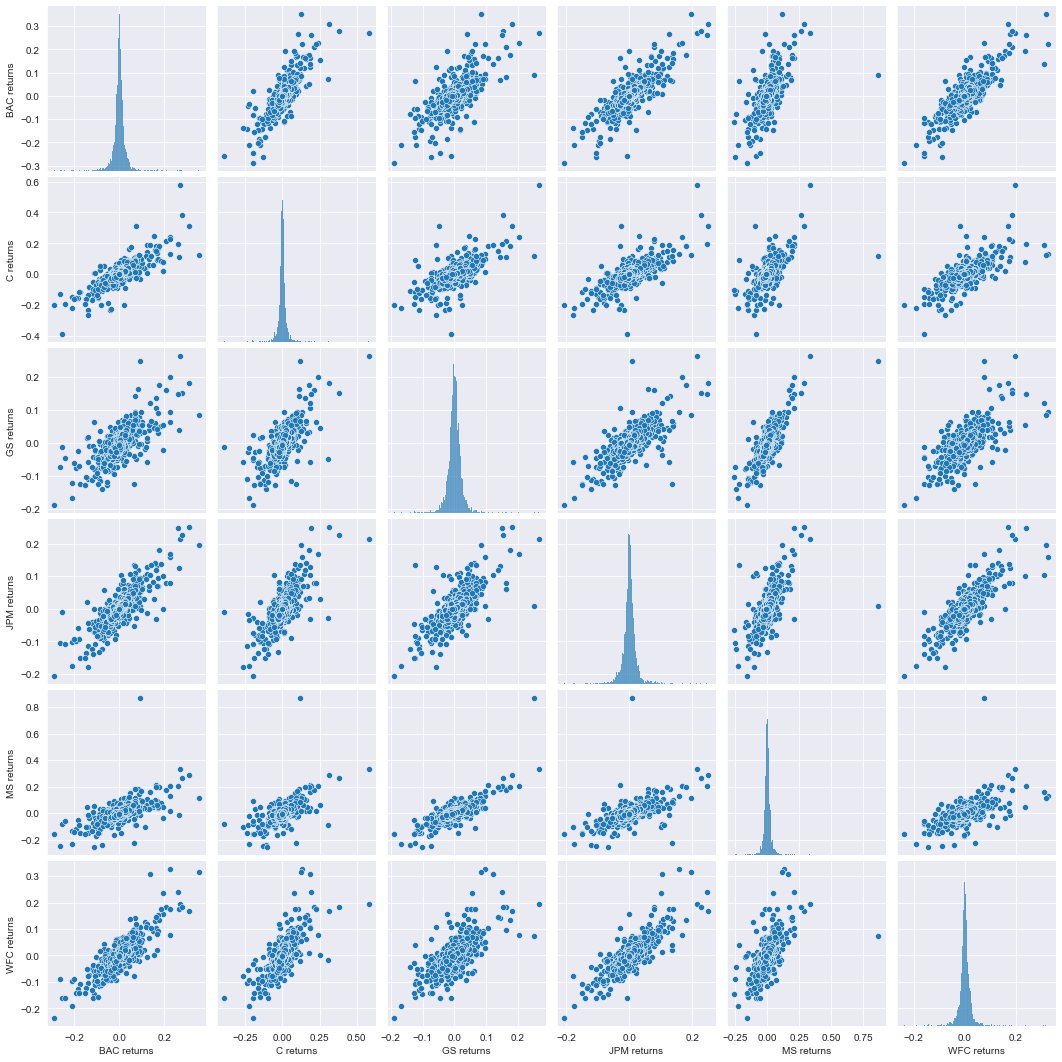

In [15]:
# Pairplot for returns
sns.pairplot(returns[1:])

In [16]:
# Finding the minimum return for each Bank
for i in returns.columns:
    print('minimum returns: ', returns[i].min())

minimum returns:  -0.2896935896149381
minimum returns:  -0.39024391189445073
minimum returns:  -0.1895961904204888
minimum returns:  -0.20727430348341036
minimum returns:  -0.25892854912751284
minimum returns:  -0.23822273502353553


In [17]:
# Looking at the Date minimum returns for each Bank
for i in returns.columns:
    print(returns[i].argmin())

1019
1046
1019
1019
950
1019


In [19]:
returns.iloc[1019]

BAC returns   -0.289694
C returns     -0.200000
GS returns    -0.189596
JPM returns   -0.207274
MS returns    -0.159718
WFC returns   -0.238223
Name: 2009-01-20 00:00:00, dtype: float64

#### We note that index 1019 is mostly common for all the Banks. This was on 2009-01-20.

In [20]:
returns.idxmin()

BAC returns   2009-01-20
C returns     2009-02-27
GS returns    2009-01-20
JPM returns   2009-01-20
MS returns    2008-10-09
WFC returns   2009-01-20
dtype: datetime64[ns]

In [21]:
returns.idxmax()

BAC returns   2009-04-09
C returns     2008-11-24
GS returns    2008-11-24
JPM returns   2009-01-21
MS returns    2008-10-13
WFC returns   2008-07-16
dtype: datetime64[ns]

In [22]:
# We look into the Standard Deviation of the Stocks
returns.std()

BAC returns    0.030828
C returns      0.032603
GS returns     0.022802
JPM returns    0.023962
MS returns     0.031771
WFC returns    0.026419
dtype: float64

#### We can say that CitiGroup stocks had the Largest Variation in the given time period.

In [25]:
# For the Year 2020
returns.loc['2020-01-01':'2020-12-31'].std()

BAC returns    0.036933
C returns      0.042502
GS returns     0.032929
JPM returns    0.034272
MS returns     0.036164
WFC returns    0.038573
dtype: float64

#### CitiGroup stocks were had the Largest Variation in year 2020.

### Distribution of CitiGroup Stocks in 2015

<AxesSubplot:xlabel='C returns', ylabel='Density'>

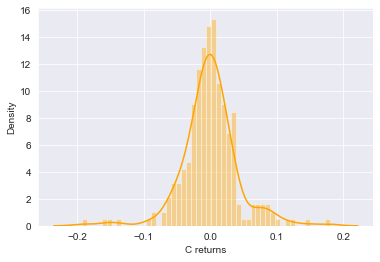

In [29]:
sns.distplot(returns['C returns']['2020'], bins = 50, color = 'orange')

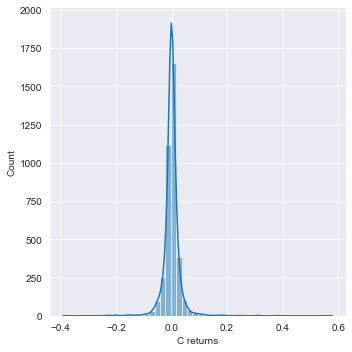

In [34]:
sns.displot(returns['C returns'].loc['2005-01-01':'2020-01-01'], kde = True, bins = 50)

### Visualizations

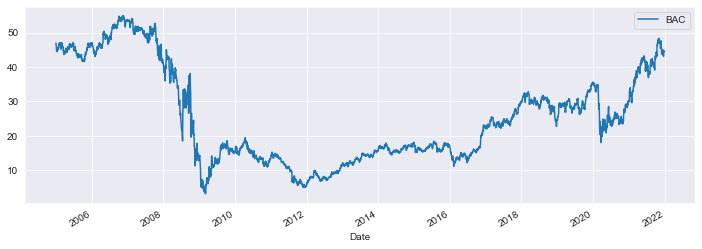

In [35]:
# Line Plot of BAC stocks
df['BAC']['Close'].plot(label = 'BAC', figsize = (12,4))
plt.legend()

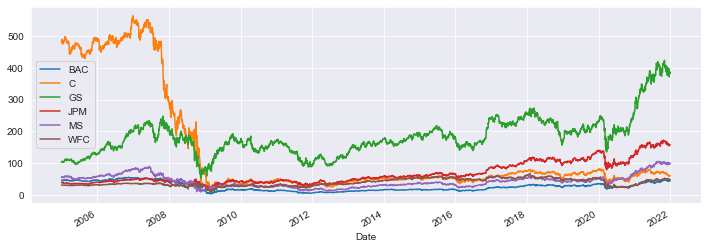

In [36]:
# Plot of all the Stocks
for i in ticks:
    df[i]['Close'].plot(label = i, figsize = (12,4))
    plt.legend()

<AxesSubplot:xlabel='Date'>

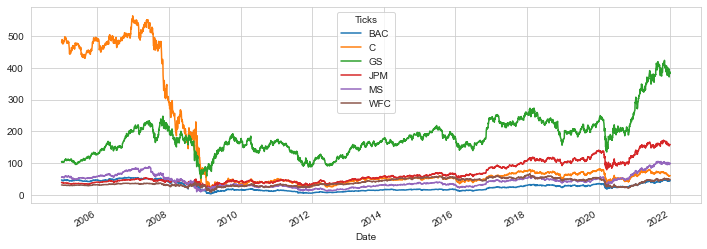

In [37]:
sns.set_style('whitegrid')
df.xs(key = 'Close', axis = 1, level = 'Info').plot(figsize = (12,4))

### Using plotly

In [38]:
import plotly
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [39]:
df.xs(key = 'Close', axis = 1, level = 'Info').iplot()

## Moving Averages - Forecasting

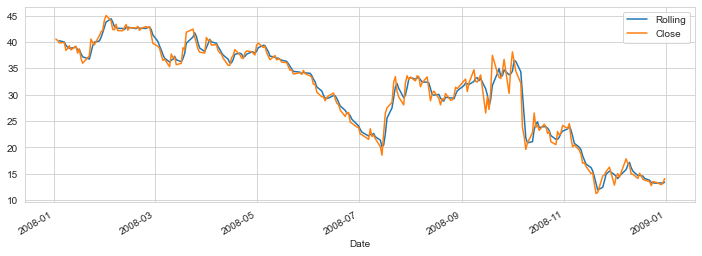

In [40]:
df['BAC']['Close'].loc['2008-01-01':'2008-12-31'].rolling(3).mean().plot(figsize= (12,4), label = 'Rolling')
df['BAC']['Close'].loc['2008-01-01':'2008-12-31'].plot()
plt.legend()
plt.show()

In [41]:
# Simple Moving Averages Plot for Morgan and Stanley Stocks.
df['MS']['Close'].ta_plot(study = 'sma')

In [42]:
df['MS']['Close'].ta_plot(study = 'sma', periods = [14, 20,30])

## Correlation

In [43]:
df.xs(key = "Close", axis = 1, level = 'Info').corr()

Ticks       BAC         C        GS       JPM        MS       WFC
Ticks                                                            
BAC    1.000000  0.827792  0.404251  0.258546  0.870766  0.034605
C      0.827792  1.000000 -0.107505 -0.291919  0.547647 -0.242009
GS     0.404251 -0.107505  1.000000  0.863275  0.740682  0.508791
JPM    0.258546 -0.291919  0.863275  1.000000  0.563183  0.558690
MS     0.870766  0.547647  0.740682  0.563183  1.000000  0.184947
WFC    0.034605 -0.242009  0.508791  0.558690  0.184947  1.000000

<AxesSubplot:xlabel='Ticks', ylabel='Ticks'>

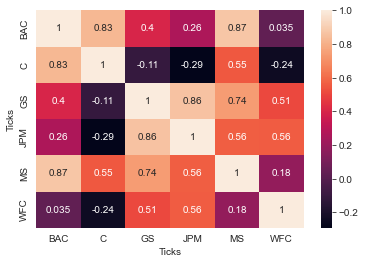

In [44]:
# Heat Map
sns.heatmap(df.xs(key = "Close", axis = 1, level = 'Info').corr(), annot = True)

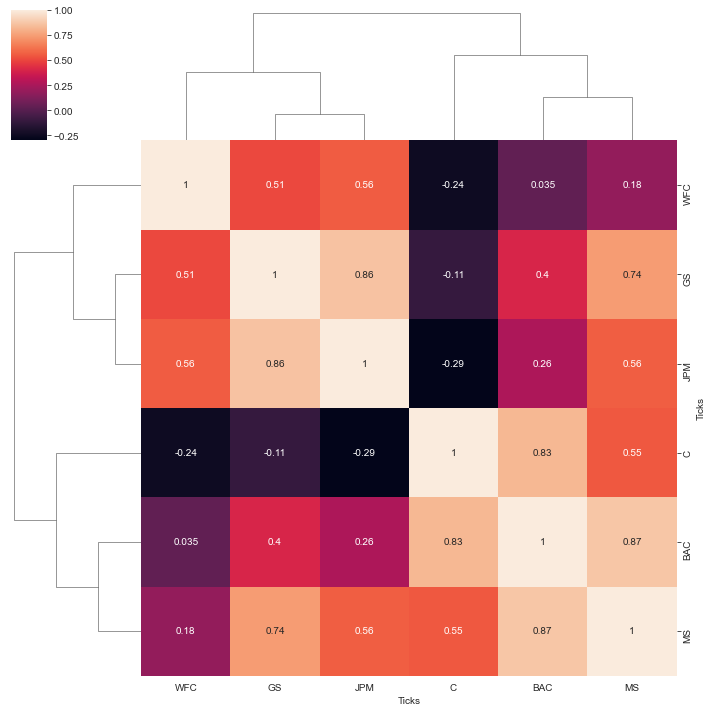

In [45]:
#Cluster Map
sns.clustermap(df.xs(key = "Close", axis = 1, level = 'Info').corr(), annot = True)

## Candle Stick Plot

In [46]:
BAC[['Open', "High", 'Low', 'Close']].iplot(kind = 'candle')